In [2]:
!pip install soccerplots

You should consider upgrading via the '/Users/michaelnazarian/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import Pitch, add_image
from matplotlib.colors import to_rgba
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
from soccerplots.radar_chart import Radar

In [3]:
pd.set_option("display.max_rows", 11)
pd.set_option("display.max_columns", 40)
pd.set_option("display.width", None)

#read in data
df = pd.read_csv("radars.csv")
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,5,33.3,1.09,0.36,0.00,0.00,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,18,45.0,1.89,0.85,0.10,0.22,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,4,23.5,0.77,0.18,0.00,0.00,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Andi Zeqiri\Andi-Zeqiri,ch SUI,FWDF,Brighton,21-253,1999,0.8,0,5,0,0.0,6.62,0.00,0.00,NaN,12.9,0,0,0,0.3,0.3,0.06,-0.3,-0.3,Matches
501,502,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,2,25.0,0.79,0.20,0.00,0.00,21.1,0,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches
502,503,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,27-348,1993,8.0,1,22,8,36.4,2.74,1.00,0.05,0.13,22.2,0,0,0,1.0,1.0,0.05,0.0,0.0,Matches
503,504,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,26-126,1994,16.0,4,15,8,53.3,0.94,0.50,0.27,0.50,10.8,0,0,0,1.0,1.0,0.07,3.0,3.0,Matches


In [8]:
df["Player"] = df["Player"].str.split("\\", expand=True)[0]
#Filter for specified players
playerlist = ["Tammy Abraham", "Timo Werner"]
playerdf = df[df.Player.isin(playerlist)].reset_index()
#df = df[(df["Player"]=="Kevin De Bruyne") | (df["Player"]=="Bruno Fernandes")].reset_index()
playerdf

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
1,481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


In [9]:
#Drop column names not needed
playerdf = playerdf.drop(["index", "90s", "Born", "Rk", "Nation", "Pos", "Squad", "Age", "Matches"], axis=1)
playerdf

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4
1,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4


In [10]:
#List with column names, index with 2 to start with not 90s
params = list(playerdf.columns)
params = params[2:]

In [11]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(playerdf[params][x])
    a = a - (a*.25)
    
    b = max(playerdf[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(playerdf["Player"])):
    if playerdf["Player"][x] == "Tammy Abraham":
        a_values = playerdf.iloc[x].values.tolist()
    if playerdf["Player"][x] == "Timo Werner":
        b_values = playerdf.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]
values

[[6,
  31,
  13,
  41.9,
  2.73,
  1.15,
  0.19,
  0.46,
  9.9,
  0,
  0,
  0,
  5.6,
  5.6,
  0.18,
  0.4,
  0.4],
 [5,
  55,
  21,
  38.2,
  2.69,
  1.03,
  0.09,
  0.24,
  13.7,
  0,
  0,
  0,
  8.4,
  8.4,
  0.15,
  -3.4,
  -3.4]]

In [12]:
#Title
#For some reason must have _ for 2nd title
title = dict(
    title_name = "Tammy Abraham",
    title_color = "lightblue",
    subtitle_name = "Manchester City",
    subtitle_color = "lightblue",
    title_name_2 = "Timo Werner",
    title_color_2 = "red",
    subtitle_name_2 = "Manchester United",
    subtitle_color_2 = "red",
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = "Created By: @Mnazarian10\nCredit To: @mckayjohns & @slothfulwave612\ndata via FBRef / StatsBomb"

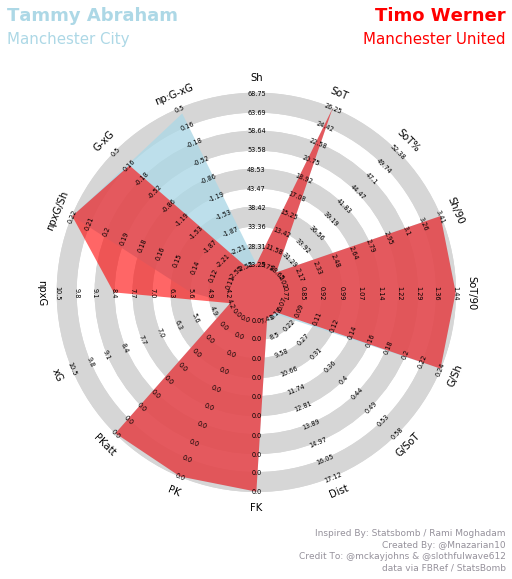

In [16]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges, params=params, values=values, radar_color=["lightblue", "red"], 
                          alphas=[.8,.6], title=title, endnote=endnote, compare=True)